<a href="https://colab.research.google.com/github/abdelrahim-hentabli/CS235Project/blob/main/FourierTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random as rand
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy.fftpack import fft 


# 1. Data Analysis

In [27]:
apple = pd.read_csv('./Data/Stocks/aapl.us.txt')
print(apple)

            Date       Open       High        Low      Close    Volume  \
0     1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030   
1     1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532   
2     1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199   
3     1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801   
4     1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062   
...          ...        ...        ...        ...        ...       ...   
8359  2017-11-06  171.75000  174.36000  171.10000  173.63000  34901241   
8360  2017-11-07  173.29000  174.51000  173.29000  174.18000  24424877   
8361  2017-11-08  174.03000  175.61000  173.71000  175.61000  24451166   
8362  2017-11-09  174.48000  175.46000  172.52000  175.25000  29533086   
8363  2017-11-10  175.11000  175.38000  174.27000  174.67000  25130494   

      OpenInt  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  

## Clean Up
Adding Return percentage per day for apple stock prices

In [28]:
percent = (apple.Open - apple.Close) / (apple.Open) * 100
apple['Return'] = percent
print(apple)

            Date       Open       High        Low      Close    Volume  \
0     1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030   
1     1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532   
2     1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199   
3     1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801   
4     1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062   
...          ...        ...        ...        ...        ...       ...   
8359  2017-11-06  171.75000  174.36000  171.10000  173.63000  34901241   
8360  2017-11-07  173.29000  174.51000  173.29000  174.18000  24424877   
8361  2017-11-08  174.03000  175.61000  173.71000  175.61000  24451166   
8362  2017-11-09  174.48000  175.46000  172.52000  175.25000  29533086   
8363  2017-11-10  175.11000  175.38000  174.27000  174.67000  25130494   

      OpenInt    Return  
0           0  0.000000  
1           0  0.599226  
2           0 -0.907893  
3      

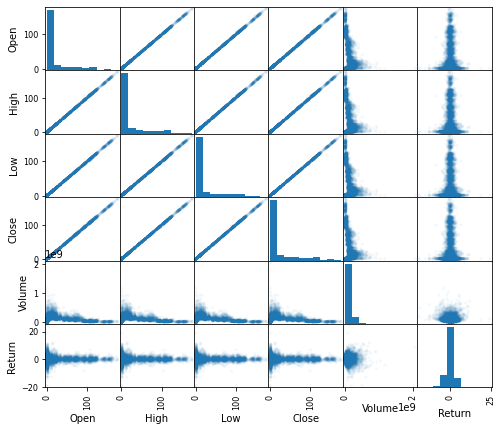

In [29]:
x = apple.iloc[:,[1,2,3,4,5,7]] # extract only a subset of columns from dataframe (using index)
y = x.dropna(thresh=5) # drop any rows that have 5 or more fields as NAN  
a = pd.plotting.scatter_matrix(x, alpha=0.05, figsize=(8,7), diagonal='hist')
plt.show()

# 2. Pre-Processing 

## Fourier Analysis
Analyzing data for Fourier Transform, looking at Apple stock closing price per day over time and daily return percentage over time.

(array([0.00158816, 0.00422386, 0.00215366, 0.00259489, 0.00298125,
        0.00416766, 0.0008567 , 0.00481704, 0.00216256, 0.00329977,
        0.00901264, 0.00992273, 0.00801623, 0.00527988, 0.00694142,
        0.00691641, 0.0040551 , 0.0029474 , 0.00734261, 0.00679865,
        0.00464234, 0.00578264, 0.00835142, 0.01081061, 0.00817293,
        0.0042904 , 0.0082968 , 0.00643353, 0.00358965, 0.00669034,
        0.010891  , 0.00743461, 0.00378767, 0.00291135, 0.00357244,
        0.00844763, 0.01165556, 0.00760287, 0.00505159, 0.00975894,
        0.00888874, 0.01032035, 0.00740619, 0.00729611, 0.00368873,
        0.00359582, 0.00641778, 0.00944339, 0.01294268, 0.01967566,
        0.00701387]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <matplot

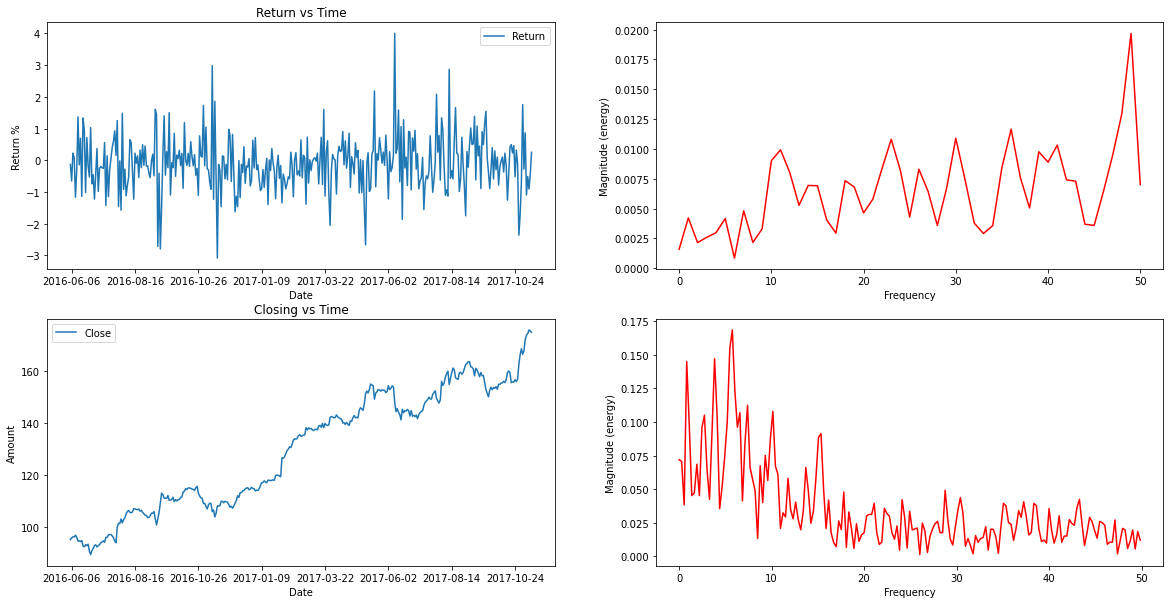

In [30]:
apple1  = apple
apple1.Date = apple1.Date[-365:]
apple1.Close = apple1.Close[-365:]
apple1.Return = apple1.Return[-365:]

figure, axes = plt.subplots(2, 2,figsize=(20,10))


apple1.plot.line('Date', 'Close', title="Closing vs Time", ylabel ='Amount',ax=axes[1,0])

# plt.subplot(2,2,2)
# assigning time values of the signal
signalAmplitude = np.sin(apple1.Close[-365:])
# plotting the magnitude spectrum of the signal 
pd1 = plt.magnitude_spectrum(signalAmplitude,Fs=100, color='red')

apple1.plot.line('Date','Return', title="Return vs Time", ylabel='Return %',ax=axes[0,0])

plt.subplot(2,2,2)
signalAmplitude = np.sin(apple1.Return[-365:])
plt.magnitude_spectrum(signalAmplitude,Fs=100,pad_to=100, color='red')

A financial time series is not stationary, therefore, Fourier transformation would not be applicable for this data series. We are able to see this throught the frequency graphs that show how the behavior of the frequency magnitude is either chaotic or non-existent.

## FFT Producing Signal



/Users/samtapia/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


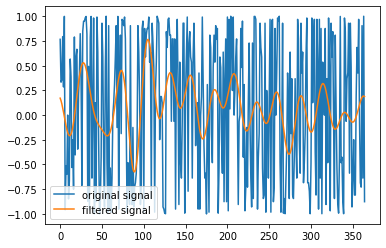

In [47]:
from scipy import fftpack

sig = np.sin(2*np.pi*apple.Close[-365:]).to_numpy()

sig_fft  = fftpack.fft(sig)

# plt.plot(sig_fft) 
amplitude = np.abs(sig_fft)
power = amplitude**2
angle = np.angle(sig_fft)

sample_freq = fftpack.fftfreq(sig.size)

amp_freq = np.array([amplitude, sample_freq])

amp_position = amp_freq[0,:].argmax()
peak_freq =  amp_freq[1, amp_position]

# print(amp_position)
# print(peak_freq)

#remove noise
high_freq_ftt = sig_fft.copy()
high_freq_ftt[np.abs(sample_freq) > peak_freq] = 0
# print(high_freq_ftt)

filter_sig  = fftpack.ifft(high_freq_ftt)
t  = np.arange(0,sig.size)
plt.plot(t,sig)
plt.plot(t,filter_sig)
plt.legend(['original signal','filtered signal'],loc="lower left")
# print(filter_sig)

## FFT for prediction

Applying the found singal as a basis for our predictor.

In [49]:
import numpy as np
import pylab as pl
from numpy import fft

def fftPrediction1(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    print(p)
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    
    for i in indexes:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

[ 0.16535225 83.58118168]
Accuracy: % 0.2684931506849315


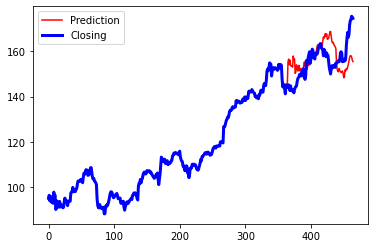

In [50]:
apple = pd.read_csv('./Data/Stocks/aapl.us.txt')
start = -465
end = -100
x = apple.Close[start:end].to_numpy()
x_t = apple.Close[-465:].to_numpy()
# print(x)
n_predict = 100
extrapolation = fftPrediction1(x, n_predict)
accuracy = 0 
for i in range(n_predict):
    if round(x[-(end+i)]) == round(extrapolation[-(end+i)]):
        accuracy += 1
print('Accuracy: %', accuracy/x.size)
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'Prediction')
pl.plot(np.arange(0, x_t.size), x_t, 'b', label = 'Closing', linewidth = 3)
pl.legend()
pl.show()